## AeN JC3 P5 snow and ice depth


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
#cartopy parts
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

In [5]:
def printstats(inputdata):
    print("number of observations: {}".format(len(inputdata)))
    print("min: {}".format(np.nanmin(inputdata)))
    print("max: {}".format(np.nanmax(inputdata)))
    print("mean: {}".format(np.nanmean(inputdata)))
    print("median: {}".format(np.nanmedian(inputdata)))
    print("standard deviation: {}".format(np.nanstd(inputdata)))
    print("skewness: {}".format(stats.skew(inputdata)))
    
    

### Import P7 transect data - day 1


In [6]:
mp_day1_file = "/mnt/documents/JC3/P5/magnaprobe/NPI10.dat"
gem2_day1_file = "/mnt/documents/JC3/P5/gem2/processed-survey/JC3-P5-transect-gem2-531-channel-thickness.csv"

In [7]:
mpcolumns = ["TIMESTAMP","RECORD","Counter","DepthCm","BattVolts","latitude_a","latitude_b","Longitude_a","Longitude_b","fix_quality","nmbr_satellites","HDOP","altitudeB","DepthVolts","LatitudeDDDDD","LongitudeDDDDD","month","dayofmonth","hourofday","minutes","seconds","microseconds"]

In [8]:
#p4snow = np.genfromtxt('P43552-timedepthlatlon-cleaned.txt')
day1snow = pd.read_csv(mp_day1_file, skiprows=5, names = mpcolumns)
day1gem2 = pd.read_csv(gem2_day1_file, low_memory=False)

In [9]:
day1snow

TIMESTAMP  RECORD  Counter  DepthCm  BattVolts  latitude_a  \
0      2002-06-27 09:04:05.2   18332   100001    0.100      10.88          69   
1     2002-07-11 12:49:42.69   18333   100001    0.100      12.83          78   
2     2002-07-11 18:37:21.81   18334   100002   -0.010       8.96          78   
3     2002-07-15 08:03:07.81   18335   100001   -0.010      13.35          80   
4     2002-07-15 08:03:10.65   18336   100002  121.000      13.35          80   
...                      ...     ...      ...      ...        ...         ...   
1034  2002-07-15 08:52:39.77   19366   101032    4.822      12.91          80   
1035  2002-07-15 08:52:51.77   19367   101033  121.000      12.91          80   
1036  2002-07-15 08:52:52.76   19368   101034  120.900      12.90          80   
1037  2002-07-15 08:52:54.32   19369   101035   -0.010      12.91          80   
1038  2002-07-15 08:52:55.62   19370   101036  120.900      12.91          80   

      latitude_b  Longitude_a  Longitude_b  fix_quality  ...  altitudeB  \
0        31.2353           19      14.4409            1  ...      -24.5   
1         9.7541           31      55.9428            1  ...        NAN   
2        35.8163           32      13.7200            1  ...        NAN   
3        35.8247           33      33.8419            1  ...       -0.4   
4        35.8243           33      33.8420            1  ...       -0.9   
...          ...          ...          ...          ...  ...        ...   
1034     35.5400           33      35.1287            1  ...       -1.6   
1035     35.5375           33      35.1544            1  ...       -0.2   
1036     35.5372           33      35.1561            1  ...          0   
1037     35.5368           33      35.1555            1  ...          0   
1038     35.5367           33      35.1551            1  ...       -0.1   

      DepthVolts LatitudeDDDDD  LongitudeDDDDD  month  dayofmonth  hourofday  \
0          0.000      0.520588        0.240682    6.0          27          9   
1          0.000      0.162568        0.932380    7.0          11         12   
2         -0.010      0.596938        0.228667    7.0          11         18   
3         -0.010      0.597078        0.564032    7.0          15          8   
4          7.719      0.597072        0.564033    7.0          15          8   
...          ...           ...             ...    ...         ...        ...   
1034       0.300      0.592333        0.585478    7.0          15          8   
1035       7.720      0.592292        0.585907    7.0          15          8   
1036       7.717      0.592287        0.585935    7.0          15          8   
1037      -0.010      0.592280        0.585925    7.0          15          8   
1038       7.717      0.592278        0.585918    7.0          15          8   

      minutes  seconds  microseconds  
0         4.0      4.0        520000  
1        49.0     42.0         10000  
2        37.0     21.0        130000  
3         3.0      7.0        130000  
4         3.0      9.0        970000  
...       ...      ...           ...  
1034     52.0     39.0         90000  
1035     52.0     51.0         90000  
1036     52.0     52.0         80000  
1037     52.0     53.0        640000  
1038     52.0     54.0        940000  

[1039 rows x 22 columns]

In [11]:
def cleansnow(snowdata):
    
    #make sane latlon
    latitude = snowdata["latitude_a"].values + snowdata["LatitudeDDDDD"].values
    longitude = snowdata["Longitude_a"].values + snowdata["LongitudeDDDDD"].values
    
    
    # return metres
    snowmetres = snowdata['DepthCm'].values / 100
    
    #clean MP end values
    the_inds = np.where((snowmetres < 1.19) & (snowmetres > 0.01))
    snowmetres = snowmetres[the_inds[0]]
    latitude = latitude[the_inds[0]]
    longitude = longitude[the_inds[0]]
    
    
    return latitude, longitude, snowmetres
    

In [12]:
day1snowlat, day1snowlon, day1snow = cleansnow(day1snow)

In [13]:
len(day1snowlat)

1017

In [38]:
len(day1snow)

1017

In [40]:
printstats(day1snow)

number of observations: 1017
min: 0.0101
max: 0.5640999999999999
mean: 0.0935955162241888
median: 0.06298
standard deviation: 0.08549569186449325
skewness: 1.8675789460268466


In [41]:
snowbins = np.arange(0,1.2,0.01)

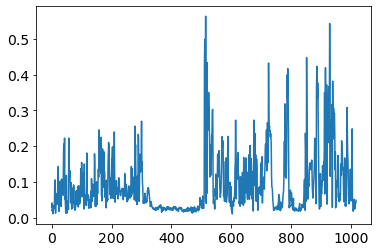

In [42]:
plt.plot(day1snow)

In [43]:
printstats(day1snow)

number of observations: 1017
min: 0.0101
max: 0.5640999999999999
mean: 0.0935955162241888
median: 0.06298
standard deviation: 0.08549569186449325
skewness: 1.8675789460268466


### Histogram
2cm bins, not a PDF

Text(0, 0.5, 'number of observations')

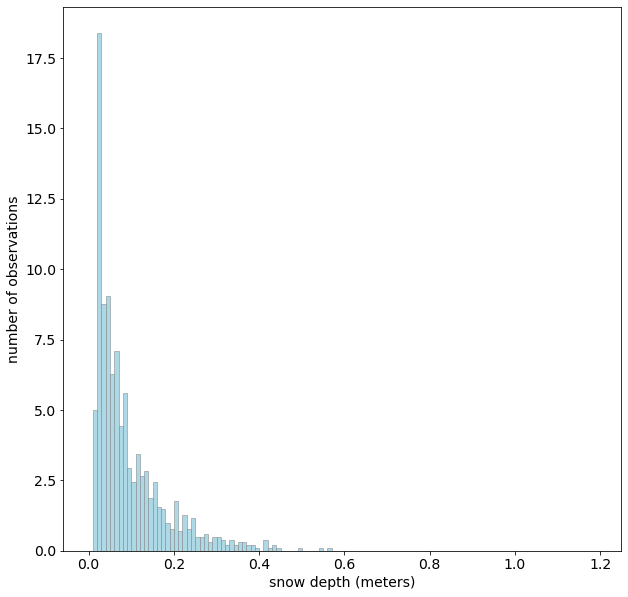

In [44]:
fig = plt.figure(figsize = (10,10))
p8hist = plt.hist(day1snow, snowbins,density=True,linewidth=0.5, ec = 'gray', facecolor='LightBlue')
plt.rcParams['font.size'] = 22
plt.xlabel("snow depth (meters)")
plt.ylabel("number of observations")
#plt.savefig("/mnt/documents/JC2-2/P9-06092021/magnaprobe/07092021/transect-mp-snowdepth-p9.png")

### Descriptive statistics

In [45]:
printstats(day1snow)

number of observations: 1017
min: 0.0101
max: 0.5640999999999999
mean: 0.0935955162241888
median: 0.06298
standard deviation: 0.08549569186449325
skewness: 1.8675789460268466


## GEM2 data

In [46]:
#gem2inputfile2 = "/mnt/documents/JC2-2/P9-06092021/gem2/07092021/JC2-2-P9-afternoon-transect-07092021-gem2-531-channel-thickness.csv"
#p9icesnow2 = pd.read_csv(gem2inputfile2)
#p9icesnow2.drop(p9icesnow2[p9icesnow2[" longitude"] == 0].index, inplace=True)
#p9icesnow2.drop(p9icesnow2[p9icesnow2[" latitude"] == 0].index, inplace=True)
#p9icesnow2.dropna(inplace = True)

In [47]:
def cleangem2(gem2df):
    gem2df.drop(gem2df[gem2df[" longitude"] == 0].index, inplace=True)
    gem2df.drop(gem2df[gem2df[" latitude"] == 0].index, inplace=True)
    gem2df.dropna(inplace = True)
    
    return gem2df
    

In [48]:
day1gem2 = cleangem2(day1gem2)

In [49]:
f450hz_hcp_i1 = [float(zi) for zi in day1gem2[" f450Hz_hcp_i"].values]
f450hz_hcp_q1 = [float(zi) for zi in day1gem2[" f450Hz_hcp_q"].values]
f1530hz_hcp_i1 = [float(zi) for zi in day1gem2[" f1530Hz_hcp_i"].values]
f1530hz_hcp_q1 = [float(zi) for zi in day1gem2[" f1530Hz_hcp_q"].values]
f5310hz_hcp_i1 = [float(zi) for zi in day1gem2[" f5310Hz_hcp_i"].values]
f5310hz_hcp_q1 = [float(zi) for zi in day1gem2[" f5310Hz_hcp_q"].values]
f18330hz_hcp_i1 = [float(zi) for zi in day1gem2[" f18330Hz_hcp_i"].values]
f18330hz_hcp_q1 = [float(zi) for zi in day1gem2[" f18330Hz_hcp_q"].values]
f63030hz_hcp_i1 = [float(zi) for zi in day1gem2[" f63030Hz_hcp_i"].values]
f63030hz_hcp_q1 = [float(zi) for zi in day1gem2[" f63030Hz_hcp_q"].values]


In [50]:
printstats(f1530hz_hcp_q1)

number of observations: 18675
min: 0.322
max: 1.736
mean: 0.6167912717536813
median: 0.5760000000000001
standard deviation: 0.20524018233091856
skewness: 1.605691248184714


In [51]:
printstats(f5310hz_hcp_q1)

number of observations: 18675
min: 0.305
max: 1.756
mean: 0.6258493708165997
median: 0.574
standard deviation: 0.2017584282297006
skewness: 1.751004196964646


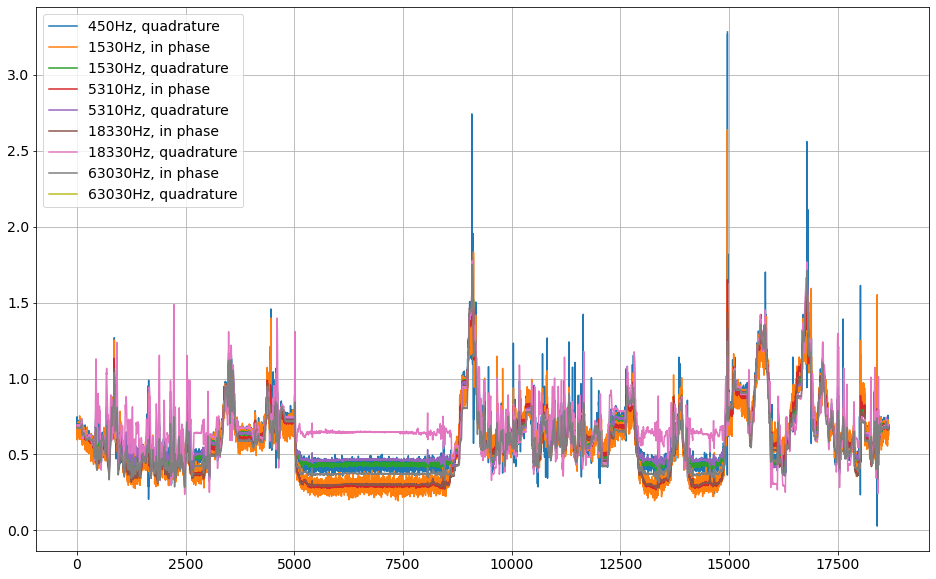

In [52]:
fig = plt.figure(figsize = (16,10))
plt.rcParams['font.size'] = 14

#plt.plot(f450hz_hcp_i1, label = "450Hz, in phase")
plt.plot(f450hz_hcp_q1, label = "450Hz, quadrature")
plt.plot(f1530hz_hcp_i1, label = "1530Hz, in phase")
plt.plot(f1530hz_hcp_q1, label = "1530Hz, quadrature")
plt.plot(f5310hz_hcp_i1, label = "5310Hz, in phase")
plt.plot(f5310hz_hcp_q1, label = "5310Hz, quadrature")
plt.plot(f18330hz_hcp_i1, label = "18330Hz, in phase")
plt.plot(f18330hz_hcp_q1, label = "18330Hz, quadrature")
plt.plot(f63030hz_hcp_i1, label = "63030Hz, in phase")
plt.plot(f63030hz_hcp_q1, label = "63030Hz, quadrature")

plt.legend()
plt.grid()


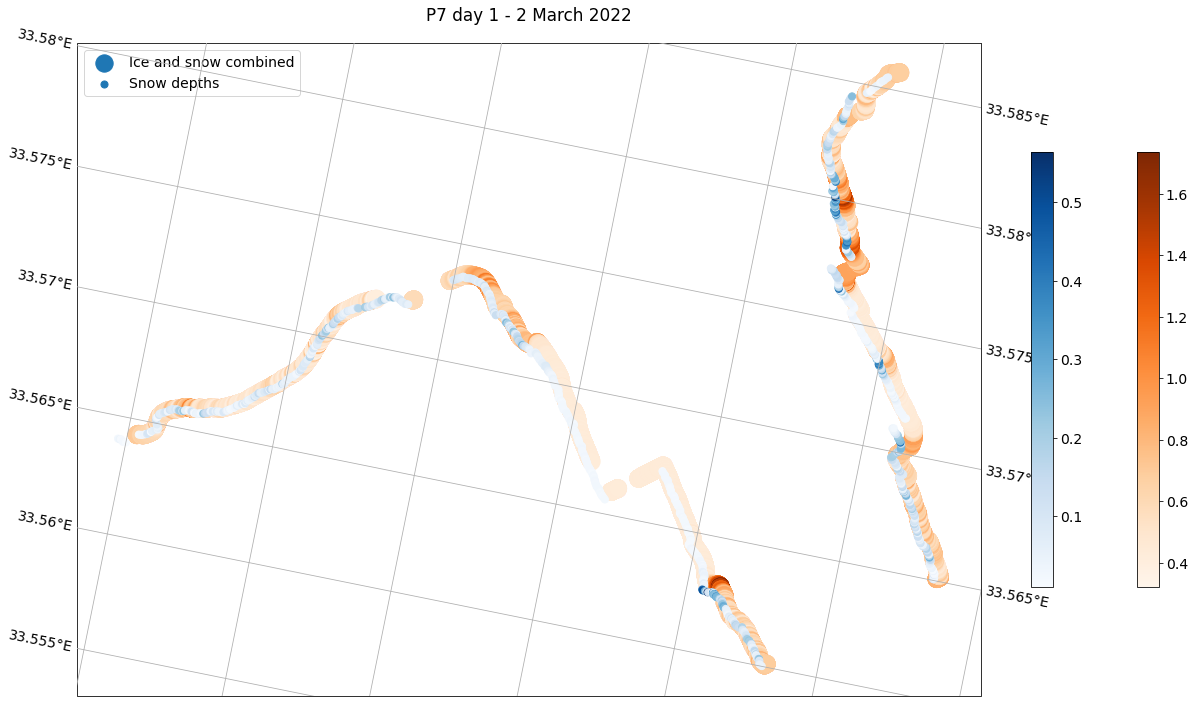

In [53]:
fig = plt.figure(figsize = (20,16))
plt.rcParams['font.size'] = 14

ax = fig.add_subplot(111,
                    projection=ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=70))

plt.scatter(day1gem2[" longitude"], day1gem2[" latitude"], c=f1530hz_hcp_q1, cmap="Oranges",
            s=300, label="Ice and snow combined",
            transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.5, fraction=0.05)

plt.scatter(day1snowlon, day1snowlat, c=day1snow, cmap='Blues', s=50, label="Snow depths",
           transform=ccrs.PlateCarree())

plt.title("P7 day 1 - 2 March 2022")
plt.legend()

plt.colorbar(shrink=0.5, fraction=0.05)

mapgrid = ax.gridlines(y_inline=True, draw_labels=True, zorder=10000)

In [61]:
icebins = np.arange(0,3,0.05)

In [62]:
gem2weights = np.ones_like(f1530hz_hcp_i1) / len(f1530hz_hcp_i1)
#icekde = stats.gaussian_kde(f1530hz_hcp_i)

icexvals = np.linspace(0, max(icebins)-1, 1000)

In [63]:

snowweights = np.ones_like(day1snow) / (len(day1snow)*10)
snowkde = stats.gaussian_kde(day1snow / snowweights)

snowxvals = np.linspace(0, max(icebins)-1, 1000)

In [64]:
from matplotlib.ticker import FormatStrFormatter

Text(0.5, 0, 'Snow depth (meters)')

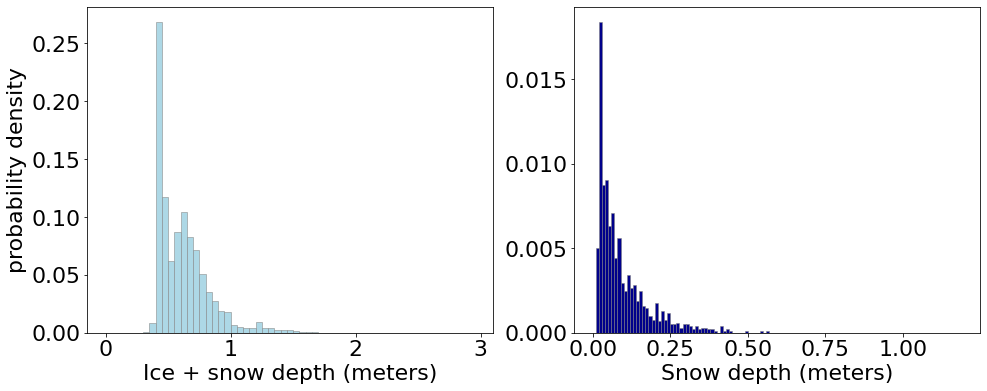

In [65]:
fig = plt.figure(figsize = (16,6))
plt.rcParams['font.size'] = 22

ax1 = fig.add_subplot(121)

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2 = fig.add_subplot(122)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

day1hist, icex, _ = ax1.hist(f1530hz_hcp_q1,icebins, linewidth=0.5, ec = 'gray', facecolor='LightBlue', weights=gem2weights, label = 'snow + ice thickness')


day1snowhist, snowx, _ = ax2.hist(day1snow,snowbins, 
                                linewidth=0.5, ec = 'gray', facecolor='DarkBlue', weights=snowweights, label = 'snow depth')


ax1.set_xlabel("Ice + snow depth (meters)")
ax1.set_ylabel("probability density")
ax2.set_xlabel("Snow depth (meters)")

#plt.savefig("/mnt/documents/JC2-2/P9-06092021/gem2/07092021/transect-all-gem2-snowice-p9.png")

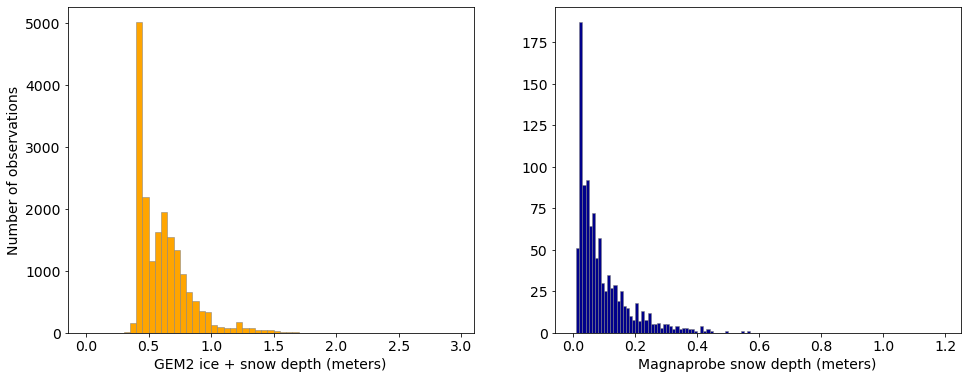

In [66]:
fig = plt.figure(figsize = (16,6))
plt.rcParams['font.size'] =14

ax1 = fig.add_subplot(121)

#ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2 = fig.add_subplot(122)
#ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

day1hist, icex, _ = ax1.hist(f1530hz_hcp_q1,icebins, linewidth=0.5, ec = 'gray',
                             facecolor='Orange', label = 'snow + ice thickness')


day1snowhist, snowx, _ = ax2.hist(day1snow,snowbins, 
                                linewidth=0.5, ec = 'gray', facecolor='DarkBlue',
                                label = 'snow depth')


ax1.set_xlabel("GEM2 ice + snow depth (meters)")
ax1.set_ylabel("Number of observations")
ax2.set_xlabel("Magnaprobe snow depth (meters)")

plt.savefig("/mnt/documents/JC3/P5/transect-summary-histograms.png")

In [68]:
stats.describe(f1530hz_hcp_q1)

DescribeResult(nobs=18675, minmax=(0.322, 1.736), mean=0.6167912717536813, variance=0.042125788174857876, skewness=1.605691248184714, kurtosis=3.3153097890254353)

In [70]:
printstats(f450hz_hcp_q1)

number of observations: 18675
min: 0.028
max: 3.283
mean: 0.6150771661133126
median: 0.573
standard deviation: 0.21188720446466927
skewness: nan


In [69]:
printstats(f1530hz_hcp_q1)

number of observations: 18675
min: 0.322
max: 1.736
mean: 0.6167912717536813
median: 0.5760000000000001
standard deviation: 0.20524018233091856
skewness: 1.605691248184714


In [ ]:
snowweights = np.ones_like(p9snowmetres) / len(p9snowmetres)
p8snowhist2 = plt.hist(p9snowmetres,snowbins,linewidth=0.5, ec = 'gray', facecolor='DarkBlue', weights=snowweights)

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

p8hist = ax.hist(f1530hz_hcp_i,icebins,linewidth=0.5, ec = 'gray', facecolor='LightBlue', weights=gem2weights)


